In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [28]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Malaria/Train'
valid_path = '/content/drive/MyDrive/Malaria/Test'

In [29]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [30]:
for layer in mobilnet.layers:
    layer.trainable = False

In [32]:
folders = glob('/content/drive/MyDrive/Malaria/Train/*')

In [33]:
folders

['/content/drive/MyDrive/Malaria/Train/Parasite',
 '/content/drive/MyDrive/Malaria/Train/Uninfected']

In [34]:
x = Flatten()(mobilnet.output)

In [35]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [37]:
from tensorflow.keras.layers import MaxPooling2D

In [38]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [39]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Malaria/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [42]:
training_set

In [43]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Malaria/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [46]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
13/13 [==============================] - 84s 6s/step - loss: 2.1741 - accuracy: 0.4760 - val_loss: 0.8149 - val_accuracy: 0.3209
Epoch 2/50
13/13 [==============================] - 13s 969ms/step - loss: 0.6579 - accuracy: 0.5649 - val_loss: 0.6998 - val_accuracy: 0.4328
Epoch 3/50
13/13 [==============================] - 13s 975ms/step - loss: 0.5000 - accuracy: 0.7596 - val_loss: 0.9323 - val_accuracy: 0.3657
Epoch 4/50
13/13 [==============================] - 13s 966ms/step - loss: 0.4263 - accuracy: 0.8005 - val_loss: 1.0858 - val_accuracy: 0.4179
Epoch 5/50
13/13 [==============================] - 13s 965ms/step - loss: 0.3550 - accuracy: 0.8534 - val_loss: 0.6599 - val_accuracy: 0.5970
Epoch 6/50
13/13 [==============================] - 13s 965ms/step - loss: 0.2761 - accuracy: 0.9062 - val_loss: 0.7154 - val_accuracy: 0.6866
Epoch 7/50
13/13 [==============================] - 13s 967ms/step - loss: 0.2495 - accuracy: 0.9062 - val_loss: 0.4433 - val_accuracy: 0.7761
Ep

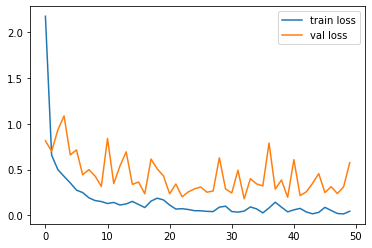

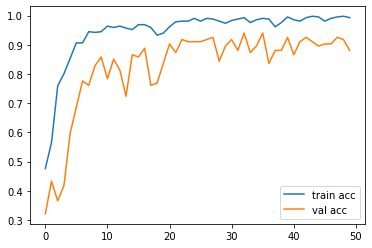

<Figure size 432x288 with 0 Axes>

In [47]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [48]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [49]:
y_pred = model.predict(test_set)

In [50]:
y_pred

array([[1.0000000e+00, 2.7268806e-08],
       [1.8228708e-03, 9.9817717e-01],
       [1.1194304e-01, 8.8805693e-01],
       [1.0000000e+00, 2.7234330e-09],
       [3.5261419e-03, 9.9647385e-01],
       [9.9998045e-01, 1.9570534e-05],
       [1.2786533e-03, 9.9872130e-01],
       [5.4146391e-03, 9.9458534e-01],
       [4.4823292e-04, 9.9955171e-01],
       [7.0585922e-04, 9.9929416e-01],
       [1.0000000e+00, 1.4316573e-16],
       [3.2666713e-01, 6.7333281e-01],
       [1.0000000e+00, 4.4152734e-14],
       [5.4758370e-01, 4.5241630e-01],
       [9.9856418e-01, 1.4358500e-03],
       [1.3098784e-02, 9.8690122e-01],
       [1.0000000e+00, 1.2180250e-16],
       [5.5588403e-04, 9.9944407e-01],
       [9.9945277e-01, 5.4720044e-04],
       [7.8852447e-03, 9.9211472e-01],
       [9.9999785e-01, 2.1978926e-06],
       [3.0575928e-03, 9.9694234e-01],
       [9.9998724e-01, 1.2778454e-05],
       [1.0514025e-03, 9.9894863e-01],
       [7.2516914e-04, 9.9927479e-01],
       [1.0000000e+00, 3.

In [51]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [52]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0])

In [53]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [54]:
model=load_model('model_vgg19.h5')

In [55]:
img=image.load_img('/content/drive/MyDrive/Malaria/Test/Uninfected/2.png',target_size=(224,224))

In [56]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [57]:
x.shape

(224, 224, 3)

In [58]:
x=x/255

In [59]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [61]:
a=np.argmax(model.predict(img_data), axis=1)

In [62]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
